In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [2]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'NAFTRACISHRS.MX'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [4]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,43.299999,42.349998,42.450001,43.169998,34389155.0,42.098640
2019-03-21,43.430000,42.970001,43.150002,43.320000,18415417.0,42.244919
2019-03-22,43.150002,42.250000,43.049999,42.340000,37550044.0,41.289242
2019-03-25,42.840000,42.439999,42.549999,42.790001,22193273.0,41.728077
2019-03-26,43.070000,42.779999,42.820000,42.910000,15219116.0,41.845097


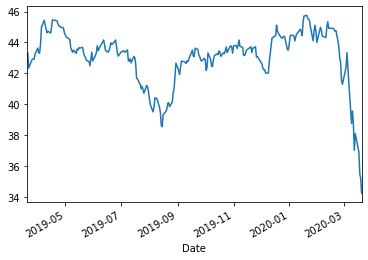

In [5]:
%matplotlib inline 
data.Close.plot()

In [6]:
def OM(df, n):
    M = pd.Series(df['Close'].diff(n), name = 'Momentum_' + str(n))
    df = df.join(M)
    return df

In [7]:
df = OM(data, 50)

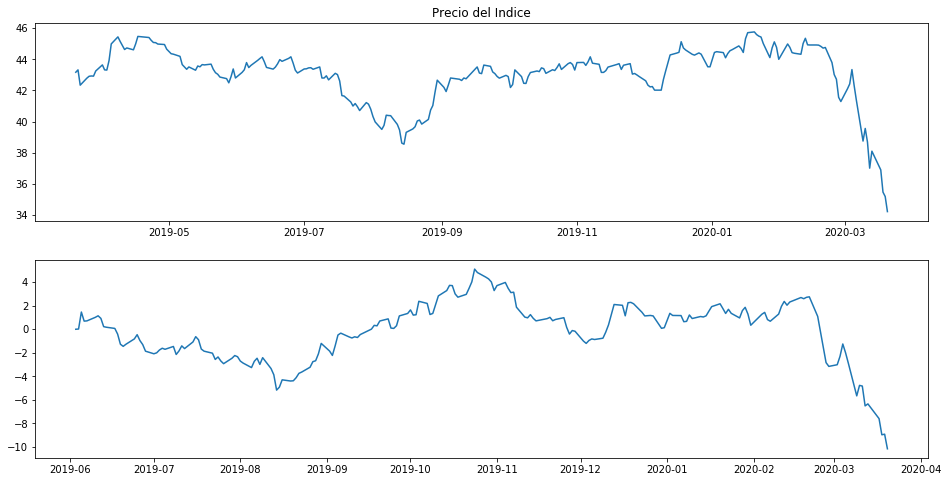

In [8]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df.Close)
plt.title('Precio del Indice')
plt.subplot(2, 1, 2)
plt.plot(df.Momentum_50)
plt.show()

In [9]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    return df

In [10]:
df2 = ROC(data, 50)

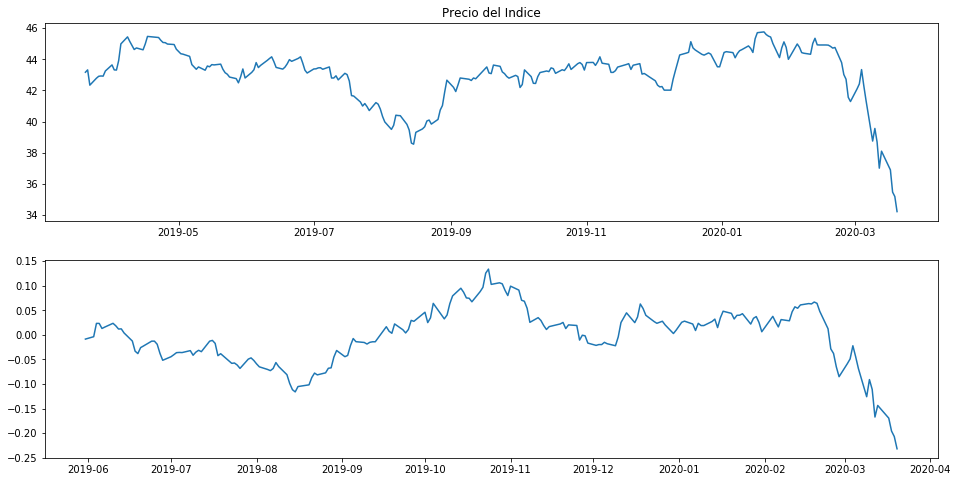

In [11]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_50)
plt.show()

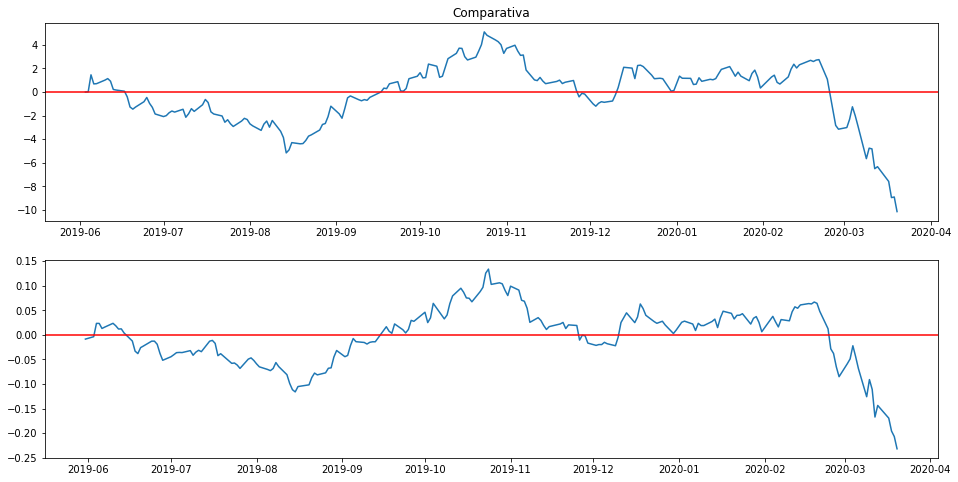

In [12]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df.Momentum_50)
plt.axhline(y=0, color= 'r')
plt.title('Comparativa')
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_50)
plt.axhline(y=0, color= 'r')
plt.show()